---
# Exercice 3  pour le TP
---


| Revenir à la [page déroulement](Readme.md) |
|-------------|



On définit les constantes et les fonctions liées aux signaux

Contrairement aux langages compilés comme ADA, C, où une fonction a un nom et doit être déclarée comme ceci par exemple

    function carre (t : in float) return float is
    begin
        return t*t;
    end function
    
Les langages interprétés (compilés pendant l'exécution on peut dire) comme matlab, python permettre de déclarer une fonction dans le code en une ligne et lui donner un nom par affectation "="

    carre = @(t) t*t

Ces fonctions sont dites anonymes, car on peut ne pas leur donner de nom par affectation et les utiliser directement.

Comme en math, **ne pas confondre une fonction $f$ et son évaluation $f(t)$** ce qui en matlab se fait en faisant un appel de la fonction pour tout un vecteur de valeurs de t. 

Donc dans le script ci-dessous **ne pas confondre la fonction `f` et le vecteur de ses valeurs `f_de_t`**



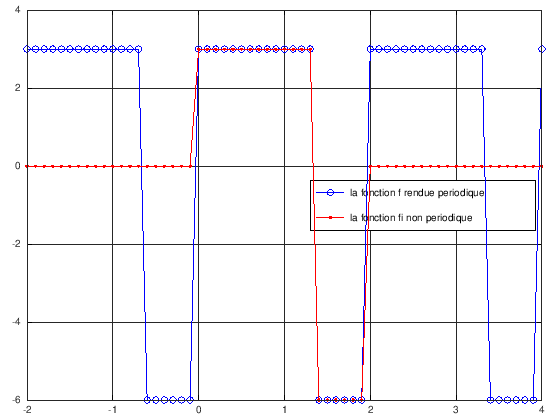

In [1]:
A=3;
T0=2;

u = @(t) t>=0; %fonction de heaviside (astuce : vrai = 1.0 )
porte = @(a,b,t) u(t-a) - u(t-b);  % fonction porte sur [a b[
porte = @(a,b,t) (t>=a) .* (t<=b); % fonction porte sur [a b]


fi=@(t) A*porte(0,2*T0/3,t)-2*A*porte(2*T0/3,T0,t) ;
% f(x) de l'exo mais juste entre [0 T0]

f = @(t) fi(mod(t ,T0)) ; %fi(x) rendue périodique => f(x)

Te=0.1;
t=-T0:Te:2*T0;  % vecteur des échantillons de temps
f_de_t = f(t) ;   % vecteur contenant [f(-T0) f(-T0+0.1) f(-T0+0.2) ... f(2T0))]

plot(t,f(t),'o-b');
grid on; hold on;
plot(t,fi(t),'.-r'); %juste une impulsion en rouge
legend(['la fonction f rendue periodique',
        'la fonction fi non periodique'],"location","east");

## Spectre analytique
On définit les coefficients analytiquement, et on trace le spectre de raies.
On peut donner les formules analytiques trouvées sous forme de fonction anonymes a, b, c.

En TP vous ferez un programme approchant ces valeurs numériquement et les stockant dans un tableau a(k), b(k), c(k) pour les premiers k donnés.

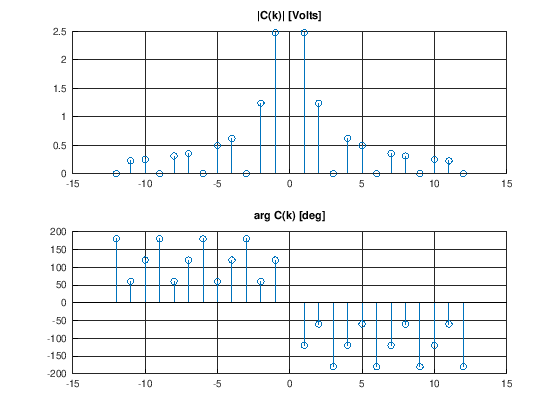

In [2]:
a = @(k) 3*A./k/pi .* sin(4/3*pi*k) ; %formule a(k) analytique calculée
b = @(k) 3*A./k/pi .* (1-cos(4/3*pi*k)) ; %formule b(k) analytique calculée
c = @(k) (a(k)-i*b(k))/2; % formule d'euler !

k = -12 : 12;

subplot(211)
    % deux rangées et une colone de graphiques
    %   on se met dans le graphique 1 => 2 1 1 
stem(k,abs(c(k)));
grid on; title('|C(k)| [Volts]')

subplot(212) % on passe dans le graphique 2
stem(k,arg(c(k))/pi*180);
grid on;title('arg C(k) [deg]')

En TP vous calculerez numériquement la valeur des $c(n), a(n), b(n)$ pour quelques valeurs de $n$.  
Ce script devra donner les mêmes valeurs que la formule trouvée analityquement.

> l'avantage est que ce script pourra calculer des SdF dont on n'a pas de résultat analytique car :
> - il n'y a pas de formule connue (primitive inconnue)
> - le signal n'est pas connu mathématiquement (enregistrement de valeurs)
> - on n'a pas le temps ni le talent pour le faire 

Il peut être utile de définir **vous-mêmes** les versions numériques des opérateurs :
- **intégrale** d'un vecteur de valeurs `integ = @(signal_de_t, Te) ...` 
- **produit scalaire périodique** entre deux signaux `scalp = @(gauche_de_t, droit_de_t, Te) ...` 
- **Série de Fourier** d'un signal `sdf = @(temps, signal_de_t, periode, Te, k) ...`

# Somme partielle

Et oui les séries de Fourier sont des séries de fonctions comme celles étudiées en ce moment en maths.
On définit la suite des fonctions harmoniques suivante :

$(f_n)_{n\in\mathbb{N}}$ avec $ f_n : t \mapsto a(n) \cos(n w_0 t) + b(n) \cos(n w_0 t)$ 

Et la suite des sommes partielles $\left( \sum\limits_{k=0}^{n}f_k\right)_{n\in\mathbb{N}}$ est bien la série de fonctions $F_n$.

Traçons les premiers termes de la série : la recomposition partielle de la fonction décomposée en série.

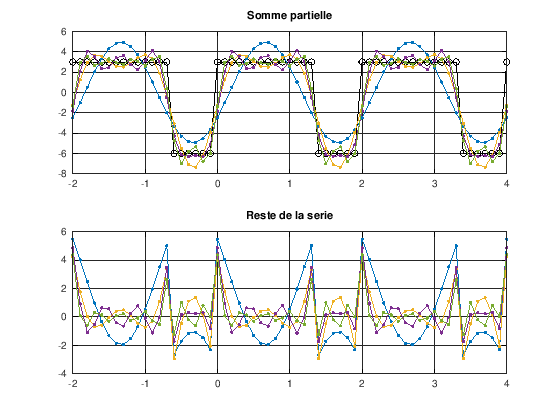

In [3]:
subplot(211)
plot(t,f(t),'o-k');
hold on; grid on;title('Somme partielle')
A0=0; % car valeur moyenne nulle.

Somme = (t==t) * A0; 
% astuce t==t = vrai = 1.0 signal constant
%   de même longueur que t. Geek !

for n = 1:5
    Somme = Somme + a(n) * cos(2*pi*n*t/T0) + b(n) * sin(2*pi*n*t/T0) ;
    
    subplot(211);
    plot(t,Somme,'.-');
    
  
    subplot(212);
    plot(t,f(t)-Somme,'.-');
    hold on; grid on;title('Reste de la serie');
    
end

## Convergence uniforme ?

On voit qu'il y a convergence simple, mais y a-t-il convergence uniforme ?

Pour cela cherchons numériquement le max du reste de la somme partielle :

$\|F_n-f\|_\infty\rightarrow 0$ quand n tends vers l'infini ? 

Que dit Dirichlet pour la valeur de la série en zéro ?

Te =  0.0010000


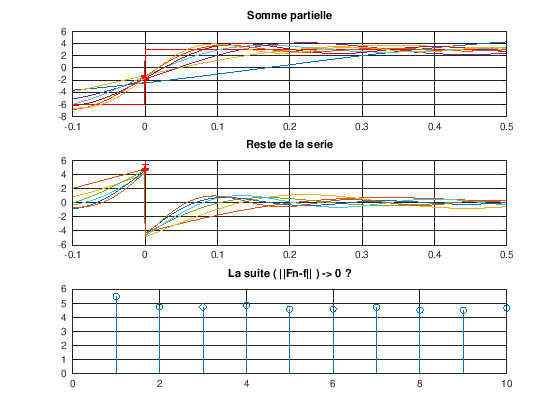

In [14]:
% on précise t autour d'une discontinuité
Te=0.001
t = -0.1:Te:0.5;

subplot(311)
plot(t,f(t),'r');
hold on; grid on;title('Somme partielle')
A0=0; % car valeur moyenne nulle.

Somme = (t==t) * A0; 
for n = 1:10
    Somme = Somme + a(n) * cos(2*pi*n*t/T0) + b(n) * sin(2*pi*n*t/T0) ;
    Reste = Somme-f(t);
    
    % max recherche la valeur maximum et l'indice de ce maximum
    [maxi,indice_max]=max(abs(Reste(1:end-1))) ;
    
    % argmax est telle que reste(t=argmax) = max de f
    argmax = t(indice_max) ; 
    
    NormeInf(n)=maxi;  % On mémorise la norme inf du reste
    
    subplot(311);
    plot(t,Somme);
    plot(argmax,Somme(indice_max),'+r')
    
  
    subplot(312);
    plot(t,Reste);
    plot(argmax,maxi,'+r')
    
    hold on; grid on;title('Reste de la serie');
    
end

%Affichons ||Fn-f|| en fonction de n pour voir si elle tends vers 0

subplot(313)
    stem(NormeInf);
    grid on;title('La suite ( ||Fn-f|| ) -> 0 ?');
 